In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

In [2]:
spark = SparkSession.builder \
   .master("local") \
   .appName("Linear Regression Model") \
   .config("spark.executor.memory", "1gb") \
   .getOrCreate()

In [3]:
sc = spark.sparkContext

In [4]:
data = spark.read.csv('Indaiatuba_BigData_Prep_2.csv', inferSchema=True, header=True)

In [6]:
data.printSchema()

root
 |-- CURSO: string (nullable = true)
 |-- TURNO: string (nullable = true)
 |-- RA: string (nullable = true)
 |-- NOME: string (nullable = true)
 |-- STATUS_ALUNO: string (nullable = true)
 |-- ESCOLA_PUBLICA: string (nullable = true)
 |-- RAÇA: string (nullable = true)
 |-- NOTA_VESTIBULAR: double (nullable = true)
 |-- DATA_NASCIMENTO: string (nullable = true)
 |-- SEMESTRE_ANO: integer (nullable = true)
 |-- SIGLA: string (nullable = true)
 |-- DISCIPLINA: string (nullable = true)
 |-- NOTA: double (nullable = true)
 |-- FREQUENCIA: double (nullable = true)
 |-- CONCEITO: string (nullable = true)



In [5]:
data.createOrReplaceTempView("data")
data = spark.sql("select * from data where CURSO == 'ANÁLISE E DESENV. DE SISTEMAS ' ")
data

DataFrame[CURSO: string, TURNO: int, NOME: string, STATUS_ALUNO: int, ESCOLA_PUBLICA: int, RAÇA: double, NOTA_VESTIBULAR: double, DISCIPLINA: string, NOTA: double, FREQUENCIA: double, CONCEITO: string, _c11: string]

In [6]:
teste = data.groupBy(['NOME', 'TURNO', 'STATUS_ALUNO', 'ESCOLA_PUBLICA', 'NOTA_VESTIBULAR']).pivot('DISCIPLINA').agg(F.min('NOTA'),F.max('NOTA'),F.count('NOTA'))

In [10]:
teste.toPandas()

,NOME,TURNO,STATUS_ALUNO,ESCOLA_PUBLICA,NOTA_VESTIBULAR,Administração Geral_min(NOTA),Administração Geral_max(NOTA),Administração Geral_count(NOTA),Algoritmos_min(NOTA),Algoritmos_max(NOTA),...,Trabalho de Graduação I_count(NOTA),Trabalho de Graduação II_min(NOTA),Trabalho de Graduação II_max(NOTA),Trabalho de Graduação II_count(NOTA),Tópicos Especiais em Informática (Escolha 2)_min(NOTA),Tópicos Especiais em Informática (Escolha 2)_max(NOTA),Tópicos Especiais em Informática (Escolha 2)_count(NOTA),Ética e Responsabilidade Profissional_min(NOTA),Ética e Responsabilidade Profissional_max(NOTA),Ética e Responsabilidade Profissional_count(NOTA)
0,BÁRBARA CASTILHO MAXIMO,Noite,Concluido ...,SIM,57.750,8.5,8.5,1.0,NaN,NaN,...,1.0,9.7,9.7,1.0,7.0,7.0,1.0,8.9,8.9,1.0
1,BRUNO ISLER SERVA ...,Noite,Cancelado ...,NAO,66.250,0.0,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0
2,MARIA CANDELÁRIA PAULINO MAZETTO ...,Noite,Cancelado ...,NAO,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RODRIGO GAVASSI MOTA ...,Noite,Cancelado ...,SIM,72.875,9.5,9.5,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LUIZ CARLOS MINOSSO,Noite,Concluido ...,SIM,73.733,6.0,6.0,1.0,NaN,NaN,...,1.0,0.0,8.6,2.0,8.0,8.0,1.0,8.7,8.7,1.0
5,REGINALDO CAMPOS DA SILVA ...,Tarde,Cancelado ...,NAO,21.725,7.0,7.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ANTONIO ROGERIO ZAMBONINI ...,Noite,Cancelado ...,SIM,62.150,0.0,5.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,VINICIUS RENAN SANTOS ...,Tarde,Cancelado ...,SIM,15.400,3.5,6.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,MARCELO TADASHI NISIHARA ...,Noite,Cancelado ...,SIM,79.200,0.0,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,ALLAN MOREIRA DE CARVALHO ...,Noite,Cancelado ...,SIM,78.375,0.0,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
print(teste.toPandas().columns)

Index(['NOME', 'TURNO', 'STATUS_ALUNO', 'ESCOLA_PUBLICA', 'NOTA_VESTIBULAR',
       'Administração Geral_min(NOTA)', 'Administração Geral_max(NOTA)',
       'Administração Geral_count(NOTA)', 'Algoritmos_min(NOTA)',
       'Algoritmos_max(NOTA)',
       ...
       'Trabalho de Graduação I_count(NOTA)',
       'Trabalho de Graduação II_min(NOTA)',
       'Trabalho de Graduação II_max(NOTA)',
       'Trabalho de Graduação II_count(NOTA)',
       'Tópicos Especiais em Informática (Escolha 2)_min(NOTA)',
       'Tópicos Especiais em Informática (Escolha 2)_max(NOTA)',
       'Tópicos Especiais em Informática (Escolha 2)_count(NOTA)',
       'Ética e Responsabilidade Profissional_min(NOTA)',
       'Ética e Responsabilidade Profissional_max(NOTA)',
       'Ética e Responsabilidade Profissional_count(NOTA)'],
      dtype='object', length=158)


In [7]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [8]:
teste = teste.drop('NOME')
cols = teste.drop('STATUS_ALUNO')
teste = teste.fillna(0)

In [9]:
#Cria uma caixa preparada para receber os dados e devolver uma coluna com sua junção
featureAssembler=VectorAssembler(inputCols=list(cols.toPandas().columns.values),outputCol='Idependent_Features')

In [10]:
#Recebe os dados -data- e adicina a coluna conforme estipulado pela caixa
output=featureAssembler.transform(teste)

In [11]:
#Apenas os dados relevantes (entradas, saida)
finalized_data = output.select('Idependent_Features','STATUS_ALUNO')
#finalized_data = finalized_data.fillna(0)

In [12]:
from pyspark.ml.regression import LinearRegression
#Cria a caixa da regreção que recebera dados
regressor = LinearRegression(featuresCol='Idependent_Features', labelCol='STATUS_ALUNO')

In [13]:
train_data,test_data = finalized_data.randomSplit([.75,.25])

In [14]:
#Coloca os dados -train_data- na caixa
regressor=regressor.fit(train_data)

In [15]:
regressor.coefficients

DenseVector([0.0085, -0.0027, 0.0003, 0.0004, -0.0001, 0.0189, 0.0, 0.0, -0.0137, 0.0005, -0.0005, 0.0113, 0.0002, -0.0002, 0.0268, 0.0007, 0.0001, -0.0176, -0.0006, 0.0001, -0.018, -0.0002, 0.0002, 0.0002, -0.0016, 0.0017, -0.0074, 0.0005, -0.0002, 0.0101, -0.0008, 0.0009, -0.0106, 0.0004, -0.0002, -0.0177, -0.0004, 0.0, 0.0041, -0.0003, -0.0006, 0.0169, 0.0012, -0.001, 0.0038, 0.0, 0.0, 0.0017, -0.0, 0.0003, 0.0146, -0.0013, 0.0021, -0.0271, 0.0003, 0.0036, 0.1087, 0.0009, -0.0017, 0.0253, -0.0007, 0.0006, -0.031, 0.0005, 0.0005, 0.01, 0.0021, -0.0019, 0.0168, -0.0004, 0.0004, -0.0227, 0.0008, -0.0009, 0.0116, 0.0005, -0.0004, 0.001, 0.0002, -0.0005, 0.026, -0.0005, 0.001, -0.0267, 0.0001, -0.0, -0.0076, -0.0008, 0.0002, 0.0282, 0.0011, -0.0018, 0.0945, 0.0002, 0.0002, -0.0008, -0.0002, 0.0002, -0.0321, -0.0003, 0.0007, -0.0228, -0.0, -0.0003, 0.009, -0.0006, 0.0013, -0.0101, 0.0, 0.0, -0.0137, -0.0003, 0.0006, 0.0056, -0.0005, 0.0011, 0.001, 0.0005, -0.0011, 0.0132, -0.001, 0.001, -

In [93]:
regressor.intercept

-0.0060609938118699955

In [16]:
pred_results=regressor.evaluate(test_data)

In [95]:
pred_results.predictions.show()

+--------------------+------------+--------------------+
| Idependent_Features|STATUS_ALUNO|          prediction|
+--------------------+------------+--------------------+
|(156,[0,1,2,5,11,...|           0|-0.00300683626677...|
|(156,[0,1,2,3,4,5...|           0|-0.06798092760758562|
|(156,[0,1,2,5,11,...|           0|0.005263716408502...|
|[1.0,1.0,66.105,7...|           1|  1.0105846111150014|
|(156,[0,2,3,4,5,9...|           0|-6.65372676712004...|
|(156,[0,1,2,3,4,5...|           0|0.011490631556541793|
|[1.0,1.0,73.733,6...|           1|  0.6665184445032304|
|(156,[0,1,2,5,9,1...|           0|-0.00386670982271...|
|(156,[0,1,2,3,4,5...|           0|0.023417281691009685|
|(156,[0,1,2,5,11,...|           0|-0.11029705945936655|
|(156,[0,2,5,11,12...|           0|-0.00533369825891...|
|(156,[0,1,2,5,11,...|           0|0.001637408359758...|
|(156,[0,1,2,5,9,1...|           0| 0.01962341456855051|
|[1.0,1.0,63.25,70...|           1|   1.083513874472269|
|(156,[0,5,11,14,1...|         

In [22]:
type(pred_results)

pyspark.ml.regression.LinearRegressionSummary

In [98]:
print(pred_results.meanAbsoluteError,',',pred_results.meanSquaredError)

0.05535651146793921 , 0.015352975257658287


In [99]:
pred_results.rootMeanSquaredError

0.12390712351458365

In [100]:
pred_results.r2

0.9125783526505105

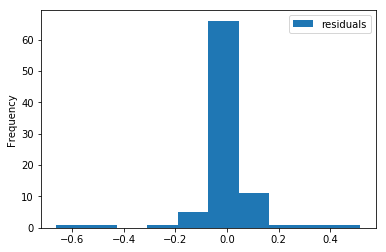

In [102]:
pred_results.residuals.toPandas().plot.hist()

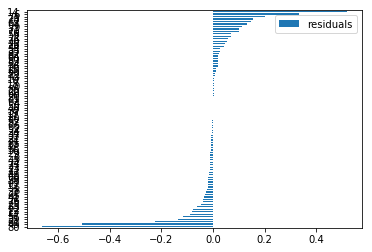

In [103]:
a=pred_results.residuals.toPandas().sort_values('residuals').plot.barh()

In [54]:
pred_results.predictions.filter('STATUS_ALUNO=1').show()

+--------------------+------------+------------------+
| Idependent_Features|STATUS_ALUNO|        prediction|
+--------------------+------------+------------------+
|[1.0,1.0,1.0,64.3...|           1|1.0040489089585356|
|[1.0,1.0,1.0,53.8...|           1|1.0503416787271203|
|[1.0,1.0,1.0,77.0...|           1|0.9038692202349692|
|[2.0,1.0,1.0,65.1...|           1|1.0338601447159461|
|[1.0,1.0,1.0,66.5...|           1|0.9387686011990755|
|[1.0,1.0,1.0,62.4...|           1|0.9719363251134924|
|[1.0,1.0,1.0,64.6...|           1| 0.892972874572125|
|[2.0,1.0,1.0,39.5...|           1|0.9987584463807407|
|[1.0,1.0,1.0,60.0...|           1|1.0206208778585921|
|[1.0,1.0,1.0,58.7...|           1|0.9809983928364711|
|[1.0,1.0,1.0,65.5...|           1|0.9169313601847545|
|[1.0,1.0,0.0,56.5...|           1| 0.938116192895122|
|[1.0,1.0,1.0,70.1...|           1| 0.984635799125969|
|[1.0,1.0,1.0,31.6...|           1|1.0097958205824193|
|[2.0,1.0,1.0,23.1...|           1|1.0018844259491388|
|[1.0,1.0,

In [47]:
coefficient_list = regressor.coefficients.tolist()

In [21]:
# Encontra os maiores coeficientes, da maneira MAIS eficiente
def largest_best(_list, k):
    _list.sort(reverse=True)
    
    for i in range(k):
        print(_list[i], end=", ")
        
# Encontra os menores coeficientes, da maneira MAIS eficiente       
def min_best(_list, k):
    _list.sort()
    
    for i in range(k):
        print(_list[i], end=", ")

In [35]:
n = 48
print("O tamanho da lista é: "+str(len(coefficient_list)))
print(f"Abaixo, os {n} maiores números no array: ")
largest_best(coefficient_list, n)
print("\n")
print(f"Abaixo, os {n} menores números no array: ")
min_best(coefficient_list, n)

O tamanho da lista é: 157
Abaixo, os 48 maiores números no array: 
0.7899107771763345, 0.02295296890967715, 0.016513830673227252, 0.0157032879379312, 0.014391877744488935, 0.014205031265142377, 0.012849664183571306, 0.012648296559492771, 0.012281427500660252, 0.00834491947736818, 0.007834111361296985, 0.007097711769302995, 0.006365008769742486, 0.005978690197795051, 0.005655728555891767, 0.005354290728246093, 0.004727580005265795, 0.004505904015516077, 0.004480086939872879, 0.004130918292333555, 0.0038274506539384, 0.0036098594284011986, 0.003186613226976797, 0.0022533006132438903, 0.001743586162191075, 0.0013974492911151232, 0.0013755160898779061, 0.0009189521749566685, 0.0008600861939221122, 0.0008177572640111018, 0.0007342339958541375, 0.0007136553343171951, 0.0006838476615882897, 0.0006013454537905127, 0.000502249208696977, 0.00043667791649734314, 0.0004216076395911806, 0.00037418159381896683, 0.0003731325870544309, 0.00028648031275607357, 0.0002779478059015085, 0.00027794780590150

In [17]:
import pandas as pd
coefficient_list = pd.DataFrame(regressor.coefficients.tolist())

In [18]:
a=[]
b=[]
for i, row in coefficient_list.iterrows():
    a.append(i)
    b.append(row[0])
df = pd.DataFrame({'index':a,'value':b})

In [19]:
df.sort_values('value')

,index,value
149,149,-0.104641
146,146,-0.101243
131,131,-0.067865
137,137,-0.063863
152,152,-0.036014
122,122,-0.032210
98,98,-0.032071
62,62,-0.031027
143,143,-0.029020
53,53,-0.027081


In [21]:
columns = teste.toPandas().columns.values

In [24]:
columns[134]

'Sistemas Operacionais I_max(NOTA)'